# ME460 Linkages - Prof. Mark Ganter
# 4 position motion generator via dyad-standard and characteristic equations

LEFT DYAD EQ.s
posl2= d1*(exp(I*p2) - 1)*exp(I*t1) + d2*(-1 + exp(-0.523598775598299*I))*exp(I*t2) - 2
posl3= d1*(exp(I*p3) - 1)*exp(I*t1) + d2*(-1 + exp(-1.22173047639603*I))*exp(I*t2) - 6
posl4= d1*(exp(I*p4) - 1)*exp(I*t1) + d2*(-1 + exp(-1.5707963267949*I))*exp(I*t2) - 8

* detlefta= 6*exp(I*p3) + 2*exp(-1.5707963267949*I)*exp(I*p3) - 8*exp(-0.523598775598299*I)*exp(I*p3) - 4*exp(I*p4) + 6*exp(-0.523598775598299*I)*exp(I*p4) - 2*exp(-1.22173047639603*I)*exp(I*p4) + 8*exp(3.88160039307552*I) + 4*exp(-1.5707963267949*I) + 2*exp(-0.523598775598299*I) - 2*exp(5.10333086947155*I) - 6*exp(3.53253454267666*I) - 6*exp(-1.22173047639603*I)

left char solution p3 & p4 -124.58791463793882 191.82206503358262
abs(left_char)= 4.49780451959622e-11

left dyad solution: r1,t1,r2,t2 = -3.12870280844771 523.2535375219275 -10.0137534100953 310.26067119000845
abs(pos3a)= 1.09e-10
abs(pos4a)= 1.22e-10

right char solution s3 & s4 86.94671252551946 27.270715860535244
abs(right_char)= 4.38417986551855e-11

<IPython.core.display.Javascript object>


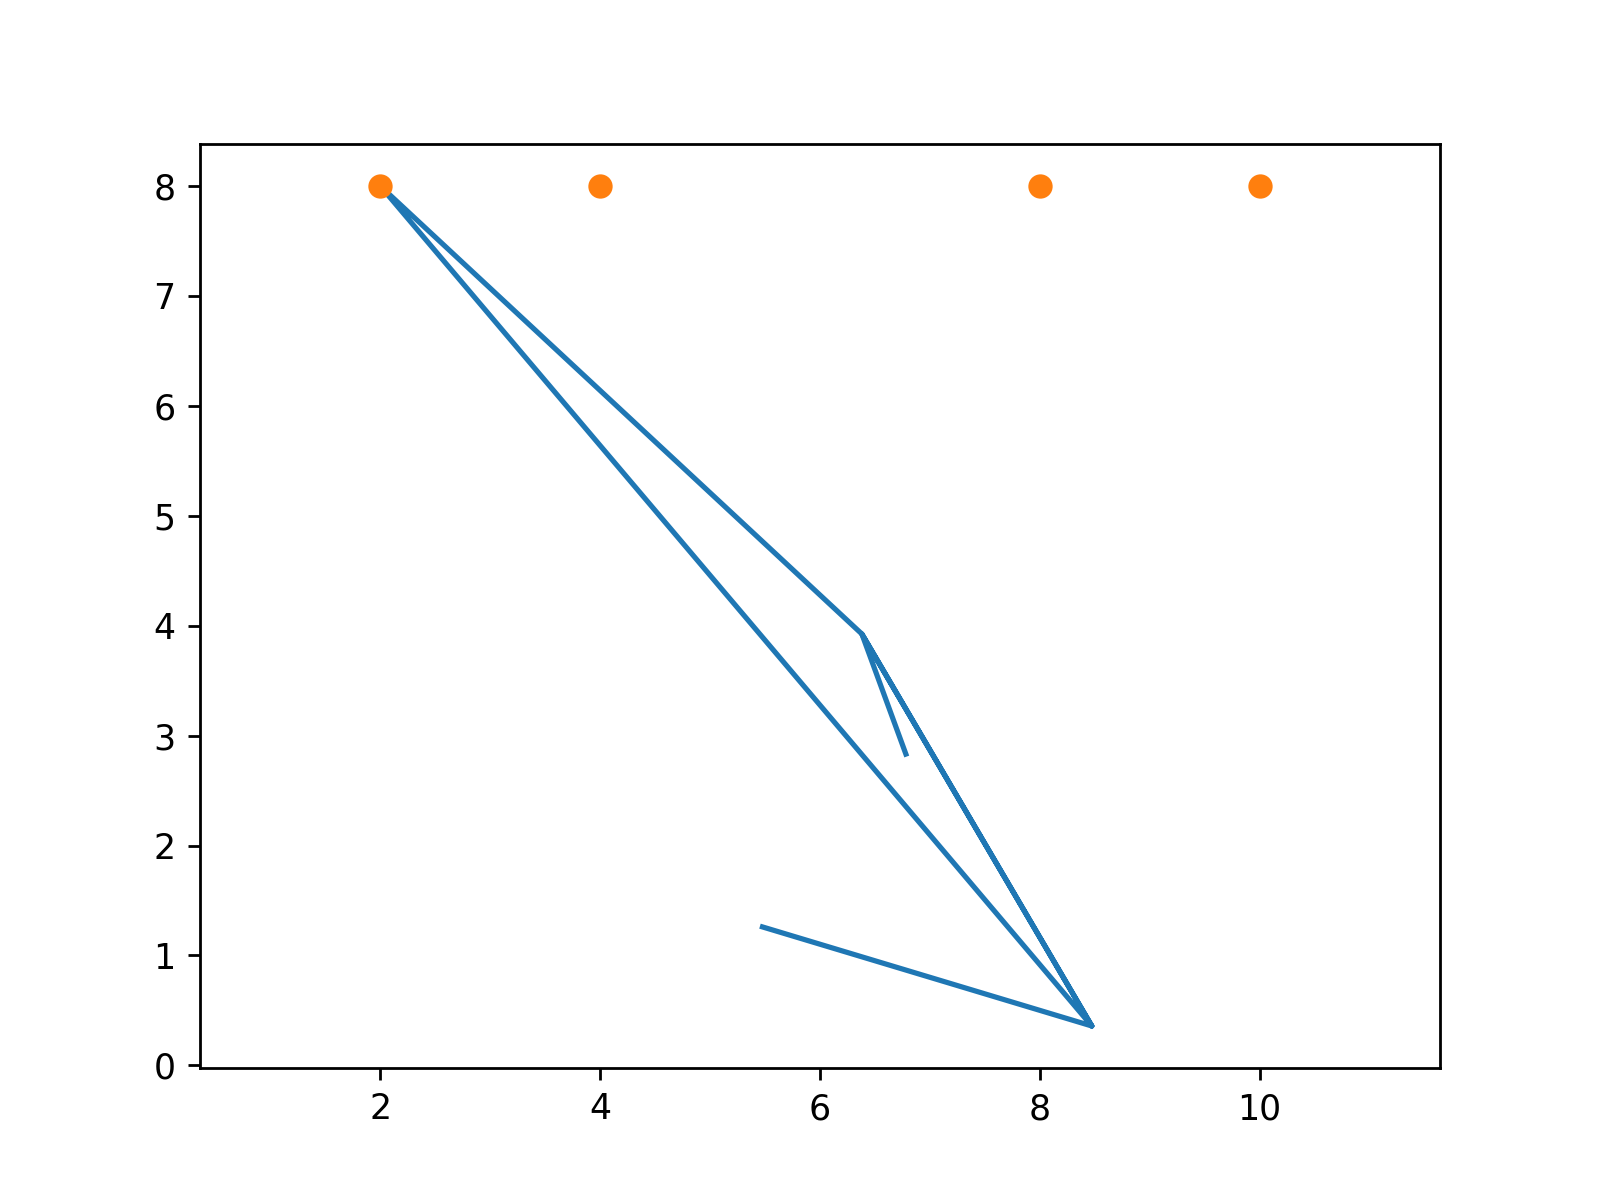

In [1]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

#define random angle function
def randang():
   return(2*np.pi*random.random())

# 4 precision coupler points
c1 = 2+8*I
c2 = 4+8*I
c3 = 8+8*I
c4 = 10+8*I


d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
p2,p3,p4 = symbols("p2 p3 p4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

del2 = c2-c1
del3 = c3-c1
del4 = c4-c1

g2 = radians(-30)
g3 = radians(-70)
g4 = radians(-90)

# LEFT SIDE #
#write out the dyad-standard equations for left side of linkage 
# posl1 = r1+r2 - c1
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4

print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print("posl4=",posl4)
print()

# characteristic polynomial approach
ang = randang()
leftside = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft = leftside.det()
detlefta = detleft.subs(p2,ang)
print("* detlefta=",detlefta)
print()

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detlefta),im(detlefta)), (p3, p4), (randang(),randang()), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution p3 & p4",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detlefta.evalf(subs={p3:ans[0],p4:ans[1]}) ))
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
pos2a = posl2.subs(p2,ang)
pos3a = posl3.subs(p3,ans[0])
pos4a = posl4.subs(p4,ans[1])

# set g's before information is overwritten
#p2a = radians(-30)
p2a = ang
p3a = ans[0]
p4a = ans[1]

#print("pos3a=",pos3a)
#print("pos4a=",pos4a)
#print()
ansl = nsolve((re(pos3a),im(pos3a),re(pos4a),im(pos4a)), (d1, t1, d2, t2), (10,randang(),20 ,randang()), 
            maxsteps=100, tol=1.0e-6, verify=false)

print("left dyad solution: r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(pos3a)=",N(abs(pos3a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(pos4a)=",N(abs(pos4a.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()

# solve the right side using information from left solutions (g3 & g4 from char. eq.)

# right characteristic equation
ang = randang()
rightside = Matrix([[(exp(I*s2)-1),(exp(I*g2)-1),del2],[(exp(I*s3)-1),(exp(I*g3)-1),del3],[(exp(I*s4)-1),(exp(I*g4)-1),del4]])
detright = rightside.det()
# s2 is a choice (or given in design specs)
detrighta = detright.subs(s2,ang)

#next solve right characteristic equation for s3 and s4
ansr = nsolve((re(detrighta),im(detrighta)), (s3, s4), (randang(),randang()), 
            maxsteps=200, tol=1.0e-6, verify=false )  #, verbose=true )

s2b = ang
s3b = ansr[0]
s4b = ansr[1]

print("right char solution s3 & s4",degrees(ansr[0]),degrees(ansr[1]))
print ("abs(right_char)=",abs(detrighta.evalf(subs={s3:s3b,s4:s4b}) ))
print()

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2b)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3b)-1) + r4*(exp(I*g3)-1) - del3
posr4 = r3*(exp(I*s4b)-1) + r4*(exp(I*g4)-1) - del4

print("RIGHT DYAD EQ.s")
print("posr2=",posr2)
print("posr3=",posr3)
print("posr4=",posr4)
print()

# now plug in results from left characteristic equation into pos. 3 & pos. 4 dyad equation and solve
ansr = nsolve((re(posr3),im(posr3),re(posr4),im(posr4)), (d3, t3, d4, t4), (20.0,randang(), 10.0 ,randang()), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("right dyad solution r3,t3,r4,t4 =",ansr[0],degrees(ansr[1]),ansr[2],degrees(ansr[3]))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print ("abs(posr4)=",N(abs(posr4.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3]}) ),3))
print()

print()
evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ansr[0],t3:ansr[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ansr[2],t4:ansr[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2a),"phi3 =",degrees(p3a),"phi4 =",degrees(p4a))
print("psi2 =",degrees(s2b),"psi3 =",degrees(s3b),"psi4 =",degrees(s4b))
print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3),"gamma4 =",degrees(g4))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

# attempt to rate the linkage
print("* Linkage Rating *")
s = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
l = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
pnq = abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)
print('P+Q > S+L =',pnq ,'>',(s+l) )
if (abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)) > (s+l):
    print("grashof = true")
else:
    print("grashof = false")
    
print("Link length ratio l/s = ",l/s)
print()

evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(c1),re(c2),re(c3),re(c4)],[im(c1),im(c2),im(c3),im(c4)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()


In [2]:
print("* detrighta=",detrighta)

* detrighta= -8*(-1 + exp(-0.523598775598299*I))*(exp(I*s3) - 1) + (-1 + exp(-1.5707963267949*I))*(2*exp(I*s3) - 2) + (-6 + 6*exp(-0.523598775598299*I))*(exp(I*s4) - 1) - (-2 + 2*exp(-1.22173047639603*I))*(exp(I*s4) - 1) + 8*(-1 + exp(-1.22173047639603*I))*(-1 + exp(0.91079596725281*I)) - (-6 + 6*exp(0.91079596725281*I))*(-1 + exp(-1.5707963267949*I))
